# Исследовательский анализ недвижимости
В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

### Знакомство с данными

In [5]:
#Вызов библиотек и открытие файла
import pandas as pd
import seaborn as sns
import matplotlib as plt 

data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t") 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
# Просмотрим общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

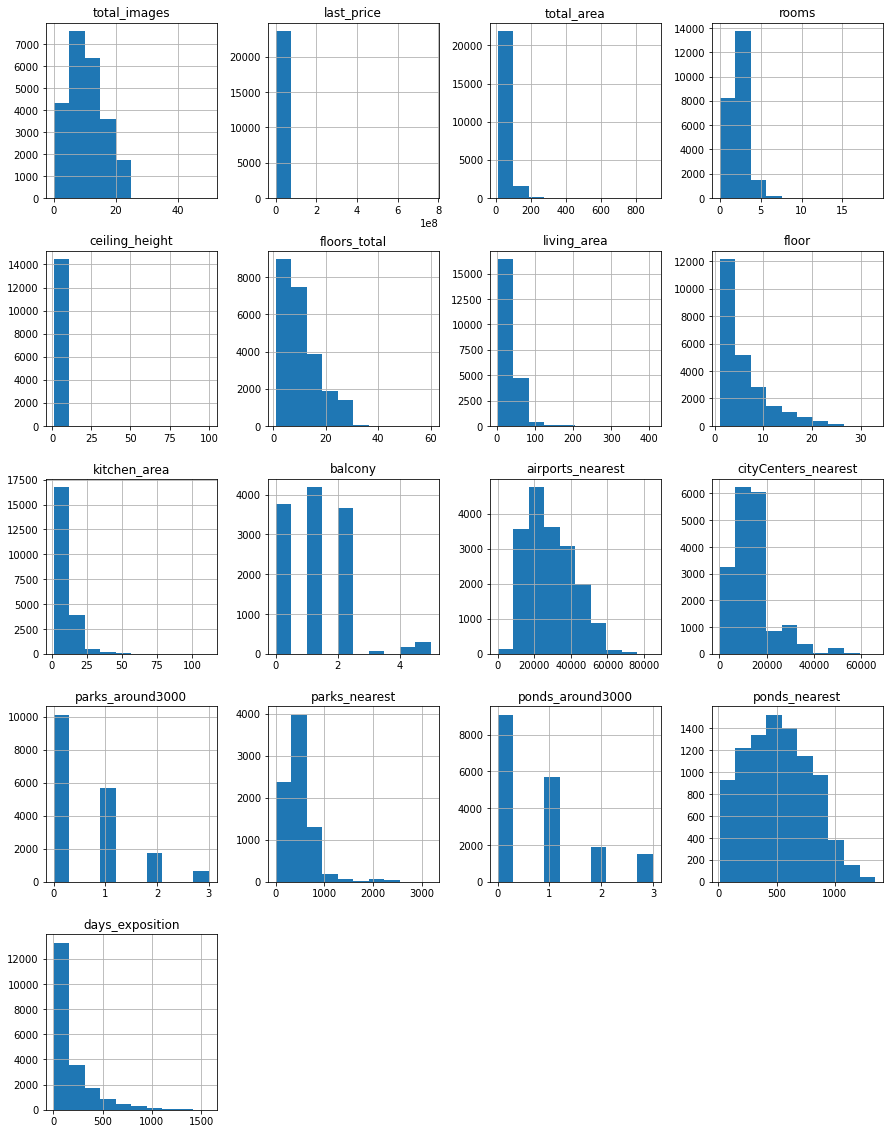

In [7]:
#Построим гистограммы для числовых столбцов
data.hist(figsize=(15, 20))

In [8]:
data.duplicated().sum()

0

**Вывод:** Данные представляют собой базу квартир с большим количеством параметров в виде целых и дробных чисел, а также дат и булевых значений. В некоторых данных наблюдаются пропуски, их придется предобработать на следующем этапе. Также, построены гистограммы, которые показывают, что часть данных описывается тем или иным распределением, например "расстояние до ближайшего водоема", а другая часть не информативна относительно значений той-же характеристики ("высота потолков").

### Предобработка данных

#### Поиск и замена пропущенных значений

In [9]:
#Определим в каких столбцах пропущены значения и по возможности заменим их
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски находятся в следующих столбцах: 

1. Высота потолков: можно попытаться заполнить пропуски медианными значениями в зависимости общей площади, при наличии корреляции.
2. Всего этажей в доме:можно попытаться заполнить пропуски медианными значениями в зависимости расстояния от центра, при наличии корреляции.
3. Жилая площадь: можно заполнить коэффициентом от общей площади.  
4. Аппартаменты или нет : нет подходящей информации для заполнения, оставляем.
5. Площадь кухни: можно заполнить коэффициентом из общей площади. 
6. Число балконов: может отсутствовать - зануляем.
7. Название населенного пункта - неизветсно, оставляем.
8. Расстояние до аэропорта и центра - если это населеный пункт, то возможно там нет аэропорта и расстояние от центра сильно не повлияет на результаты в таких пунктах, оставляем.
9. Расстояние до ближайшего парка и количество парков в радиусе 3км: может не быть парков - зануляем.
10.Расстояние до водоема  и количество водоемов в радиусе 3км: может не быть водоемов - зануляем.
11. Количество дней с начала до снятия объявления: неизвестен статус объявления, может еще висит, а может что-то еще -     оставляем.

In [10]:
#Занулим значения в столбцах с пропусками из списка выше:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [11]:
#Найдем, сущесвтует ли связь между параметрами, в которых можно заполнить пропуски
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.037085,0.027731,0.011323,0.010240,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.008559,-0.026239,-0.206747,0.197840,0.116925,0.208621,0.089704,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.200211,0.119286,0.200294,0.087529,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.157495,0.081345,0.121276,0.058442,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.031216,-0.023947,-0.091689,0.062216,0.032019,0.072343,0.010788,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.158775,-0.063007,-0.048698,0.017264,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.212357,0.108947,0.182439,0.083549,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.105212,-0.039509,-0.029710,0.013698,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.032014,-0.023214,-0.009690,-0.004826,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.032639,-0.013583,-0.004204,-0.016378,-0.012254,-0.004127,-0.003491,-0.024112


Из столбцов, в которых потенциально можно сделать замену, корреллируют с другими параметрами, следующие: количество этажей с этажом, жилая площадь с общей и площадь кухни с общей.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

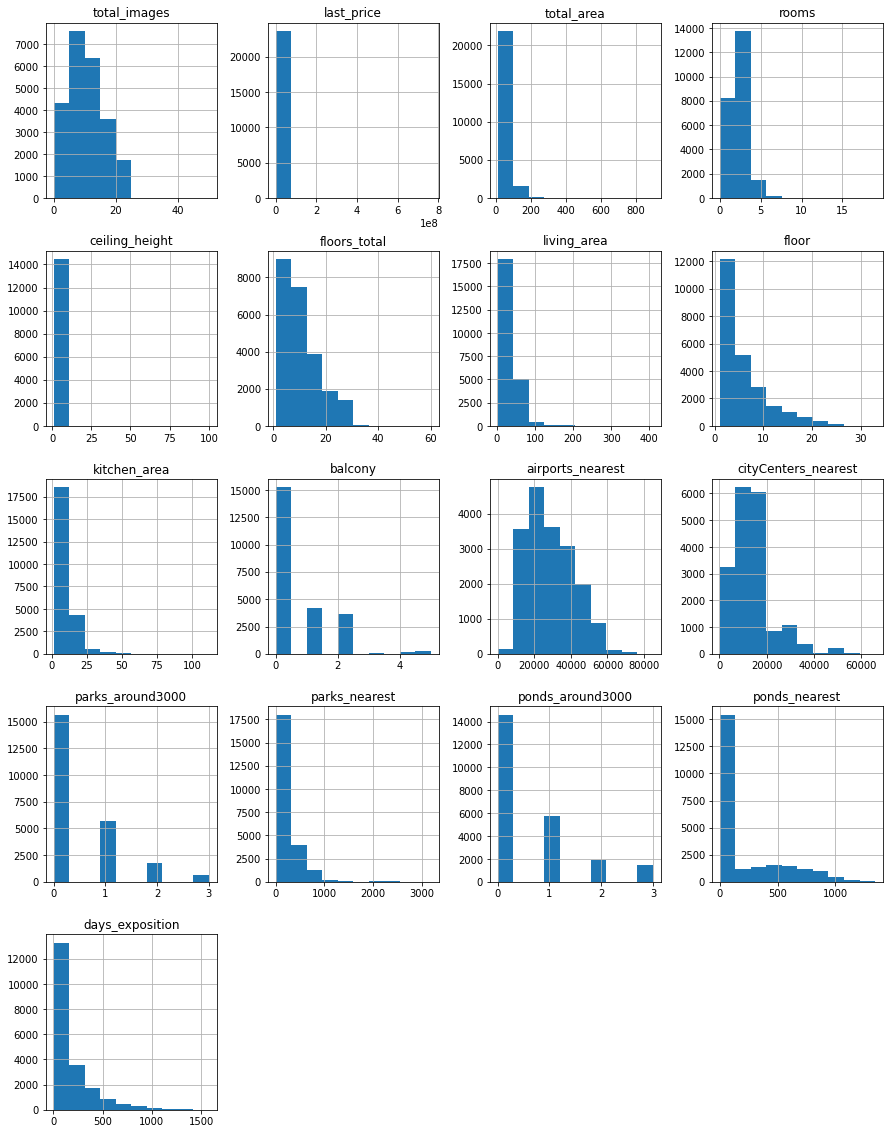

In [12]:
#Заполним пропуски 
#По жилой площади
area_ratio_living = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull()==False]['living_area'].mean() 
data['living_area'] = data['living_area'].fillna(data['total_area']/area_ratio_living)
#По кухне
area_ratio_kitchen = data[data['living_area'].isnull() == False]['total_area'].mean() /data[data['kitchen_area'].isnull()==False]['kitchen_area'].mean() 
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/area_ratio_kitchen)
# По этажам
for f in data['floor'].unique():
    data.loc[(data['floor'] == f) & (data['floors_total'].isna()), 'floors_total'] = \
    int(data.loc[(data['floor'] == f), 'floors_total'].median())
data.hist(figsize=(15, 20))

Избавились от пропусков и не исказили исходные данные. Природа пропусков может быть различна, в некоторых случаях возможна техническая ошибка, в некоторых отсутсвие данных, а в некоторых отсутвие объекта как такового. 

#### Анализ типов данных

In [13]:
# Выведем информацию по датасету
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,91.177695,9,NaN,...,27.848168,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [15]:
# Переведем явные числа с ненулевой дробной частью (не считая nan) в формат целых чисел
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
# Также, переведем дату в другой формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,NaN,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,NaN,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.177695,9,NaN,...,27.848168,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Данные были переведены в корректный формат, целые числа теперь представлены целыми значениями, а дата имеет тип datetime.

#### Устранение дубликатов

In [17]:
# Просмотрим количество строк-дубликатов 
data.duplicated().sum()

0

In [18]:
#Проверим уникальные значения в столбце с названиями
#data['locality_name'].unique()

In [19]:
#Уберем тип н/п
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [20]:
data['locality_name'] = data['locality_name'].replace(
    ['коттеджный ', 'станции ', 'садовое товарищество ', 'при железнодорожной ',
     'село ', 'городской поселок ', 'деревня ', 'поселок ', 'городского типа '], '', regex=True)

In [21]:
list(data['locality_name'].sort_values(ascending=False).unique())

['садоводческое некоммерческое товарищество Лесная Поляна',
 'имени Свердлова',
 'имени Морозова',
 'Янино-1',
 'Ям-Тесово',
 'Яльгелево',
 'Ялгино',
 'Юкки',
 'Щеглово',
 'Шушары',
 'Шум',
 'Шугозеро',
 'Шпаньково',
 'Шлиссельбург',
 'Чудской Бор',
 'Цвылево',
 'Цвелодубово',
 'Хязельки',
 'Хапо-Ое',
 'Форт Красная Горка',
 'Форносово',
 'Федоровское',
 'Фалилеево',
 'Ушаки',
 'Усть-Луга',
 'Усть-Ижора',
 'Ульяновка',
 'Углово',
 'Трубников Бор',
 'Тосно',
 'Торфяное',
 'Торошковичи',
 'Торосово',
 'Торковичи',
 'Токсово',
 'Тойворово',
 'Тихковицы',
 'Тихвин',
 'Тесово-4',
 'Терпилицы',
 'Терволово',
 'Тельмана',
 'Тарасово',
 'Тайцы',
 'Сясьстрой',
 'Сяськелево',
 'Счастье',
 'Суходолье',
 'Суоранда',
 'Сумино',
 'Суйда',
 'Стрельна',
 'Стеклянный',
 'Старые Бегуницы',
 'Старосиверская',
 'Старополье',
 'Старое Хинколово',
 'Старая Пустошь',
 'Старая Малукса',
 'Старая Ладога',
 'Старая',
 'Сосновый Бор',
 'Сосново',
 'Совхозный',
 'Советский',
 'Снегиревка',
 'Сланцы',
 'Синявино',

#### Поиск редких значений

<AxesSubplot:>

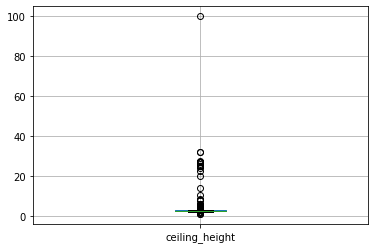

In [22]:
# Найдем столбцы с редкими значениями
# Явные выбросы наблюдаются в колонке с высотой потолков
data.boxplot('ceiling_height')

<AxesSubplot:>

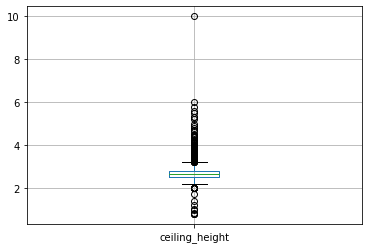

In [23]:
#Явно ошибка, разделим значения потолков с высотой больше 8м. на 10  
for i in data['ceiling_height']:
    if i >= 8:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i / 10})
data.boxplot('ceiling_height')

Отсеяли редкие значения, возможно на следующих этапах встретятся еще аномальные данные, проанализируем их в процессе построений

**Вывод:** В результате предобработки были заполнены пропуски, изменены типы данных, исправлены аномальные значения, а также обработаны неявные дубликаты, которые возникали из-за схожих названий населенных пунктов. 

### Добавление вспомогательных данных

In [24]:
# Добавим в таблицу новые данные
#Выведем данные
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,NaN,...,11.000000,2,Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,NaN,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.177695,9,NaN,...,27.848168,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [25]:
# Добавим функцию для присвоения типа этажам квартир
def floors_type_func(row):
        if row['floor']==1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'Другой'  

data['floor_type'] = data.apply(floors_type_func, axis =1)
data['floor_type'].unique() 

array(['Другой', 'первый', 'последний'], dtype=object)

In [26]:
data['price_per_area'] = data['last_price'] / data['total_area'] #Цена 1 кв.м.
data['day_w_expos'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #День недели размещения объявления
data['month_expos']= pd.DatetimeIndex(data['first_day_exposition']).month #Месяц недели размещения объявления
data['year_expos'] = pd.DatetimeIndex(data['first_day_exposition']).year #Год недели размещения объявления

data['cityCenters_km'] = (data['cityCenters_nearest']/1000).round() # Расстояние от центра в км.

In [27]:
# Заменим значения недель и месяцев названиями
def month_type(row):
        if row == 1:
            return 'Январь'
        elif row == 2:
            return 'Февраль'
        elif row == 3:
            return 'Март'
        elif row == 4:
            return 'Апрель'
        elif row == 5:
            return 'Май'
        elif row ==6:
            return 'Июнь'
        elif row == 7:
            return 'Июль'
        elif row == 8:
            return 'Август'
        elif row == 9:
            return 'Сентябрь'
        elif row == 10:
            return 'Октябрь'
        elif row == 11:
            return 'Ноябрь'
        elif row == 12:
            return 'Декабрь'
data['month_expos_str'] = data['month_expos'].apply(month_type)
def day_type(row):
        if row == 1:
            return 'Понедельник'
        elif row == 2:
            return 'Вторник'
        elif row == 3:
            return 'Среда'
        elif row == 4:
            return 'Четверг'
        elif row == 5:
            return 'Пятница'
        elif row ==6:
            return 'Суббота'
        elif row == 7:
            return 'Воскресенье'
data['day_str'] = data['day_w_expos'].apply(day_type)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_type,price_per_area,day_w_expos,month_expos,year_expos,cityCenters_km,month_expos_str,day_str
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,755.0,NaN,Другой,120370.370370,3,3,2019,16.0,Март,Среда
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,NaN,...,0.0,81.0,первый,82920.792079,1,12,2018,19.0,Декабрь,Понедельник
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,NaN,...,574.0,558.0,Другой,92785.714286,3,8,2015,14.0,Август,Среда
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,91.177695,9,NaN,...,234.0,424.0,Другой,408176.100629,4,7,2015,7.0,Июль,Четверг
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,48.0,121.0,Другой,100000.000000,1,6,2018,8.0,Июнь,Понедельник


### Исследовательский анализ данных

#### Общий анализ количественных данных

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

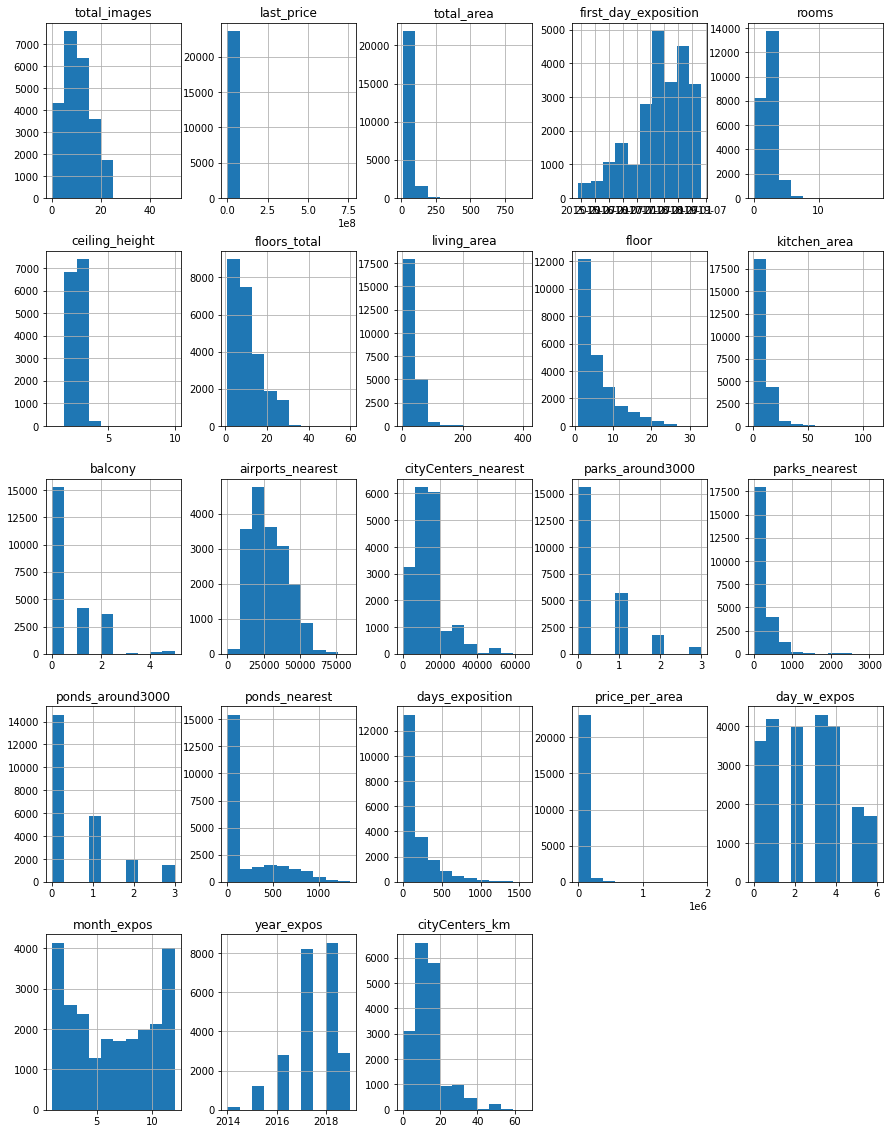

In [28]:
#Построим гистограммы по всем числовым характеристикам 
data.hist(figsize = (15, 20))

Гистограммы отражают следующие закономерности:
1. Основная масса квартир находятся в пределах 20км от центра, большую часть из объявлений занимают квратиры находящиеся на расстоянии 15-20 км. от центра, в два раза меньше квартир которые находятся ближе;
2. Квартиры, в основном представлены в малоэтажных домах, бОльшая часть объявлений описывает дома до десяти этажей;
3. Высота потолков практически во всех квартирах из объявлений не превышает двух - трех метров; 
4. Основная доля квартир располагается на нижних этажах, однако это может быть связано с тем, что наибольшее количество объявлений из малоэтажных домов.
5. Практически все квартиры располагаются вдали аэропортов, но не сильно, в предалах 30км, количество объявлений сильно далеких от аэропортов сильно снижается после этой отметки.
6. Количество парков и прудов показывают схожую картину. Так, в пределах 3км, в большенстве случаев они отсуствуют и наблюдается снижение количества парков и прудов с удалением от квартиры. Схожая динамика от удаленности может говорить о том, что наличие пруда приравнивается к парковой зоне.
7. Объявления не выкладываются по средам и пятнциам и воскрсеньям. Также, наблюдается рост количсетва объявлений в начале и конца года, а также спад в летнее время.
8. Возможно сервис запустился в 2014г., после этого периода наблюдается рост количества объявлений.
9. Некоторые гистограммы не показательны, необходимо рассмотреть их отдельно.

<AxesSubplot:>

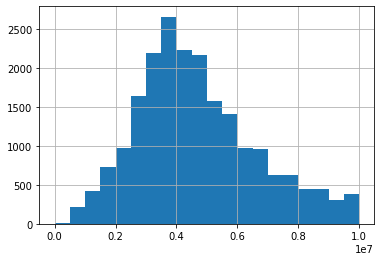

In [29]:
#Рассмотрим часть гистограмм более детально 
data['last_price'].hist(bins=20, range=(0, 10000000)) #По последней цене

In [30]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [31]:
# Рассмторим объявления, цена которых ниже 100 тыс.руб
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_type,price_per_area,day_w_expos,month_expos,year_expos,cityCenters_km,month_expos_str,day_str
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,0.0,8.0,последний,111.834862,2,3,2019,9.0,Март,Вторник


In [32]:
# Посмотрим сколько стоят квартиры с похожей площадью
data.query('105<total_area < 110').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_type,price_per_area,day_w_expos,month_expos,year_expos,cityCenters_km,month_expos_str,day_str
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,755.0,NaN,Другой,120370.370370,3,3,2019,16.0,Март,Среда
140,8,16912000.0,105.7,2016-12-09,2,2.70,3,48.400000,1,NaN,...,179.0,390.0,первый,160000.000000,4,12,2016,27.0,Декабрь,Четверг
179,5,14800000.0,108.7,2019-04-11,3,4.00,5,72.400000,5,NaN,...,0.0,NaN,последний,136154.553818,3,4,2019,3.0,Апрель,Среда
276,5,23900000.0,108.4,2018-11-15,3,3.06,7,62.161397,6,NaN,...,678.0,96.0,Другой,220479.704797,3,11,2018,5.0,Ноябрь,Среда
315,8,13900000.0,108.0,2018-09-29,4,NaN,6,76.900000,2,False,...,0.0,156.0,Другой,128703.703704,5,9,2018,4.0,Сентябрь,Пятница


In [33]:
#Похоже, что цена этой квартиры записана в тыс.руб., изменим это значение
#data['last_price'].where(data['last_price']!= 12190.0, 12190000.0)
data.loc[data['last_price'] == 12190.0, 'last_price'] = 12190000.0
data['last_price'][8793]

12190000.0

Распределение итоговой стоимости можно назвать нормальным. Средняя цена квартир на уровне 6,5 млн. руб.

<AxesSubplot:>

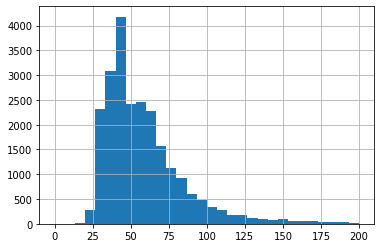

In [34]:
#Рассмотрим часть гистограмм более детально 
data['total_area'].hist(bins=30, range=(0, 200)) #По площади

Распределение данного парамтера больше похоже на распределение Пирсона. Наблюдается низкое количество объявлений квартир с площадью менее 30 кв.м., далее наибольшее количество объявлений в диапозоне от 30 до 60 кв.м. с медианой в районе 45, и далее плавное снижение количества объявлений до 200 кв.м., где их количество стремится к нулю. 

<AxesSubplot:>

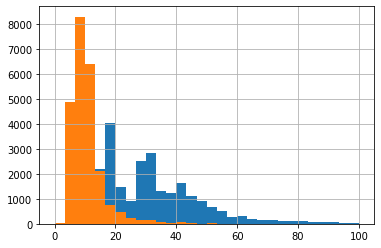

In [35]:
data['living_area'].hist(bins=30, range=(0, 100)) # По жилой площади и площади кухни совместно
data['kitchen_area'].hist(bins=30, range=(0, 100))

Гистограмма по площади кухни отражает распределение общей площади и закономерно ниже ее, как и жилая площадь, однако вид распределения жилой площади несколько отличается и имеет двумодальное распределение.  

**Вывод:** Наблюдаются некоторые закономерности по полученным гистограммам, в основном объеме объявлений содержатся сведения о квартирах с площадью менее 50 кв.м. с потолками величиной 2-3 м., удаленных от аэропортов.

#### Анализ скорости продажи квартир

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

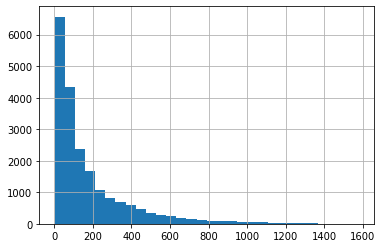

In [36]:
# Рассмотрим столбец с датой снятия объявления с продажи
data['days_exposition'].hist(bins=30)
data['days_exposition'].describe()

<AxesSubplot:>

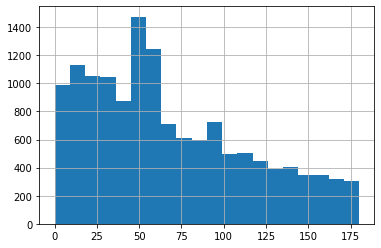

In [37]:
#Построим гистограмму до 180 дней
data['days_exposition'].hist(bins=20, range = (0, 180))

**Вывод:**
В среднем, продажа квартиры занимает 180 дней, однако медианное значение составляет 95 дней, для такой большой выборки это значение более показательное. Также, мы видим высокую величину стандартного отклонения, значения не так близки к среднему. Квартиры, которые продаются меньше чем за 3 месяца можно считать быстрыми, в то время как продажи дольше 232 дней можно считать долгими. Время длительных продаж может достигать 1580 дней, подобные случаи, возможно, являются следствием не закрытых объявлений.  

#### Анализ стоимости объектов

              kitchen_area  last_price  living_area  total_area
kitchen_area      1.000000    0.522456     0.481197    0.653019
last_price        0.522456    1.000000     0.630450    0.715763
living_area       0.481197    0.630450     1.000000    0.949886
total_area        0.653019    0.715763     0.949886    1.000000


array([[<AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <Axes

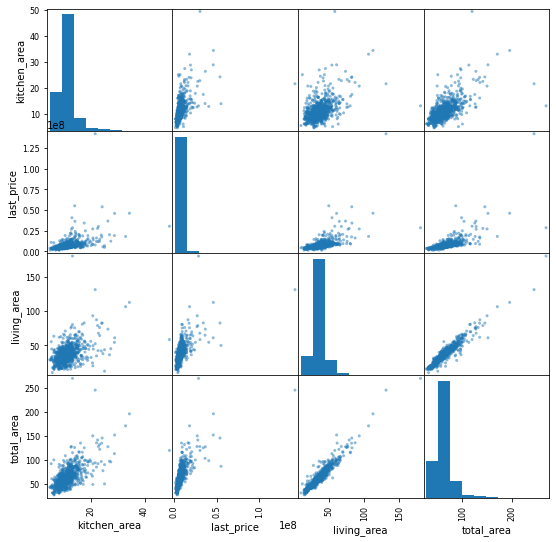

In [38]:
#Построим сопоставления параметров квартиры и установим их влияние на общую стоимость
price_stat = data.pivot_table(index = 'first_day_exposition', 
values = ['last_price','total_area','living_area', 'kitchen_area', 'floor_type'])

print(price_stat.corr())
pd.plotting.scatter_matrix(price_stat, figsize=(9, 9)) 

На общую стоимость квартир больше всего влияют параметры общей площади и соотвественно жилой площади. В меньшей мере и как следствие зависимости от общей площади - площадь кухни. Количество комнат оказывают несущественное влияние на итоговую стоимость квартир, но тренд присутсвует, хоть и с небольшим коэффициентом корреляции. 

<AxesSubplot:xlabel='rooms'>

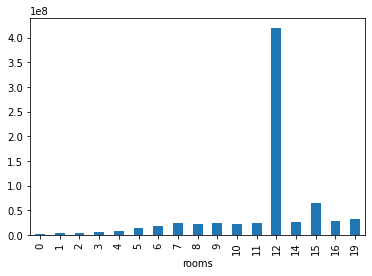

In [39]:
#Построим зависимость цены от количества комнат
room_group = data.groupby('rooms').median()
room_group['last_price'].plot(kind = 'bar')

In [40]:
#просмотрим выбивающееся значение
data.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_type,price_per_area,day_w_expos,month_expos,year_expos,cityCenters_km,month_expos_str,day_str
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,318.0,106.0,последний,466666.666667,2,12,2017,8.0,Декабрь,Вторник


Наблюается закономерный рост цены, с ростом количества комнат. В данных присутствует квартира с очень большой стоимостью, которая выглядит аномально на графике. Также, квартиры с большим количеством комнат имеют большую площади, соотвественно подтверждаем влияние площади на цену.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

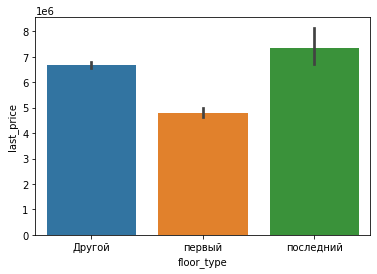

In [41]:
#Рассмотрим зависимость цены от этажа, построим столбчатую диаграмму
sns.barplot(x = data['floor_type'] , y= data['last_price'])

По статистике цена квартир, которые находятся на первом этаже существтенно ниже, это может быть связано с различными неудобствами таких квартир. Наибольшую цену имеют квартиры на последних этажах, возможно из-за меньшего шума, возможно из-за более широкого обзора вида из окон. Все остальные квартиры находятся среднем ценовом диапозоне.

<AxesSubplot:xlabel='month_expos_str', ylabel='last_price'>

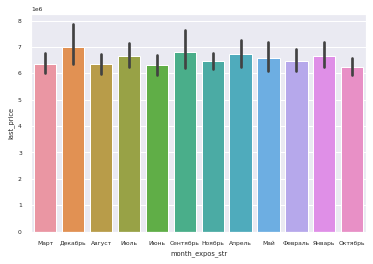

In [42]:
# Рассмотрим влияние периодов размещения на цену
sns.set (font_scale= 0.55 )
sns.barplot(x = data['month_expos_str'] , y= data['last_price']) # По месяцу


<AxesSubplot:xlabel='day_str', ylabel='last_price'>

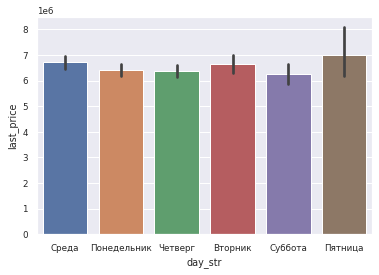

In [43]:
sns.set (font_scale= 0.8 )
sns.barplot(x = data['day_str'] , y= data['last_price'])# По неделям

<AxesSubplot:xlabel='year_expos', ylabel='last_price'>

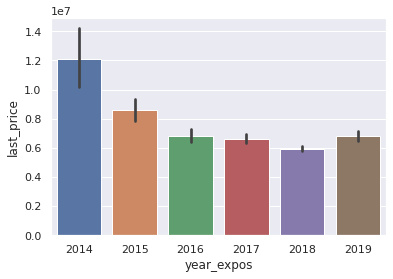

In [44]:
sns.set (font_scale= 1)
sns.barplot(x = data['year_expos'] , y= data['last_price'])

Итоговая цена практически не меняется от месяца к месяцу и от недели к неделе. Однако есть тенденция по годам, так, итоговая цена постепенно падает начиная с 2014.

In [45]:
# Проанализируем стоимость квадратного метра в разных н/п
mean_price = data.pivot_table(index = 'locality_name', values = 'price_per_area', aggfunc = ['count', 'mean'])
mean_price.sort_values(by=[('count','price_per_area')], ascending=False).head(10)

,count,mean
,price_per_area,price_per_area
locality_name,,
Санкт-Петербург,15721,114849.008794
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458


Самая высокая цена квадратного метра пренадлежит Санкт-Петербургу, самая низкая - Выборгу.

<AxesSubplot:xlabel='cityCenters_km'>

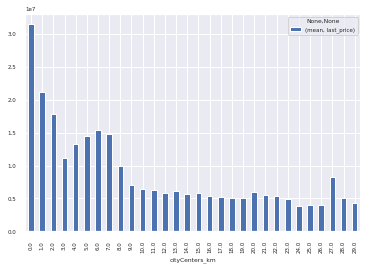

In [46]:
#Далее найдем как влияет расстояние от центра на стоимость
sns.set (font_scale= 0.5)
spb_grouped = (
    data
    .query('locality_name == "Санкт-Петербург"').pivot_table(index= 'cityCenters_km', values = 'last_price', aggfunc = ['mean'] )
)
spb_grouped.plot(kind = 'bar')
#spb_grouped['km_price'] = spb_grouped['price_per_area'] / spb_grouped['cityCenters_km']
#sns.barplot(x = spb_grouped['cityCenters_km'] , y= spb_grouped['km_price'])

Прослеживается явная корреляция цены от расстояния. Средняя цена кв.м. сильно выше в квартирах, расположенных близко к центру, до 7 км., далее, средняя стоимость каждого километра изменяется незначительно.

**Вывод:** Наибольшее влияние на итоговую стоимость квартиры оказывает площадь квартиры и расстояние от центра. Также на стоимость сильно влияет населенный пункт. Так, цена за кв.м. в Санкт-Петербурге и Выборге отличается практически в два раза.

### Общий вывод

Анализ данных недвижимости удалось осуществить в результате предобработки данных и исключения аномальных значений. По результатам исследования получены следующие выводы:
1. 

    1. Основная масса квартир находятся в пределах 20км от центра, большую часть из объявлений занимают квратиры находящиеся на расстоянии 15-20 км. от центра, в два раза меньше квартир которые находятся ближе;
    2. Квартиры, в основном представлены в малоэтажных домах, бОльшая часть объявлений описывает дома до десяти этажей;
    3. Высота потолков практически во всех квартирах из объявлений не превышает двух - трех метров; 
    4. Основная доля квартир располагается на нижних этажах, однако это может быть связано с тем, что наибольшее количество объявлений из малоэтажных домов.
    5. Практически все квартиры располагаются вдали аэропортов, но не сильно, в предалах 30км, количество объявлений сильно далеких от аэропортов сильно снижается после этой отметки.
    6. Количество парков и прудов показывают схожую картину. Так, в пределах 3км, в большенстве случаев они отсуствуют и наблюдается снижение количества парков и прудов с удалением от квартиры. Схожая динамика от удаленности может говорить о том, что наличие пруда приравнивается к парковой зоне.
    7. Объявления не выкладываются по средам и пятнциам и воскрсеньям. Также, наблюдается рост количсетва объявлений в начале и конца года, а также спад в летнее время.
    8. Возможно сервис запустился в 2014г., после этого периода наблюдается рост количества объявлений.
    
2. На общую стоимость квартир больше всего влияют параметры общей площади и соотвественно жилой площади. В меньшей мере и как следствие зависимости от общей площади - площадь кухни. Количество комнат оказывают несущественное влияние на итоговую стоимость квартир, но тренд присутсвует, хоть и с небольшим коэффициентом корреляции. 
3.По статистике цена квартир, которые находятся на первом этаже существтенно ниже, это может быть связано с различными неудобствами таких квартир. Наибольшую цену имеют квартиры на последних этажах, возможно из-за меньшего шума, возможно из-за более широкого обзора вида из окон. Все остальные квартиры находятся среднем ценовом диапозоне.
4.Итоговая цена практически не меняется от месяца к месяцу и от недели к неделе.
5.Самая высокая цена квадратного метра пренадлежит Санкт-Петербургу, самая низкая - Выборгу.
6.Прослеживается явная корреляция цены от расстояния. Средняя цена кв.м. сильно выше в квартирах, расположенных близко к центру, до 7 км., далее, средняя стоимость каждого километра изменяется незначительно.